# Face Classification - Preprocessing
### Anggota Kelompok:
- Dofi Saputra (`41522110006`)

- Marino Imola (`41522110022`)

- Hanafi Ali Akbar (`41522110023`)

- Achmad Tegar Almannudin (`41522110055`)

<br>

Notebook ini berisi langkah-langkah untuk melakukan preprocessing data image menggunakan library `face_recognition` dan pengolahan data wajah dari dataset. Proses meliputi deteksi wajah, encoding fitur wajah, serta penyimpanan hasil dalam format CSV.

In [1]:
import pandas as pd
import mat73

### Importing Libraries
Pada bagian ini, kita mengimpor dua library penting yang digunakan dalam analisis data:

- `pandas` adalah library yang sangat populer untuk manipulasi data dan analisis dalam Python. Ini akan memungkinkan kita bekerja dengan struktur data seperti DataFrame, yang mempermudah dalam mengolah data yang kompleks.

- `mat73` digunakan untuk membaca file `.mat` (MATLAB files) versi 7.3 yang tersimpan dalam format HDF5. Ini bermanfaat jika Anda memiliki data dari MATLAB yang perlu diekstrak ke dalam Python.

In [2]:

data_dir = "/home/dofi/python/face-classification"
img_dir = f"{data_dir}/lfw"
attr_path = f"{data_dir}/lfw_att_73.mat"


### Setting File Paths

- `data_dir` berisi path direktori utama di mana proyek klasifikasi wajah disimpan. Ini mencakup semua data yang diperlukan untuk proyek.

- `img_dir` menyimpan path ke folder yang berisi gambar wajah (dalam hal ini, folder "lfw").

- `attr_path` merujuk pada file `.mat` yang berisi atribut terkait gambar wajah yang tersimpan dalam format MATLAB. File ini kemungkinan besar berisi metadata atau label yang berhubungan dengan gambar-gambar di folder `img_dir`.

In [3]:
data = mat73.loadmat(attr_path)
df = pd.DataFrame(data['label'], columns=data['AttrName'], index=data['name'])
df.index = [name.replace('\\', '/') for name in df.index]
df

,Male,Asian,White,Black,Baby,Child,Youth,Middle Aged,Senior,Black Hair,...,Pale Skin,5 o Clock Shadow,Strong Nose-Mouth Lines,Wearing Lipstick,Flushed Face,High Cheekbones,Brown Eyes,Wearing Earrings,Wearing Necktie,Wearing Necklace
Aaron_Eckhart/Aaron_Eckhart_0001.jpg,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
Aaron_Guiel/Aaron_Guiel_0001.jpg,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
Aaron_Patterson/Aaron_Patterson_0001.jpg,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
Aaron_Peirsol/Aaron_Peirsol_0001.jpg,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
Aaron_Peirsol/Aaron_Peirsol_0002.jpg,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zorica_Radovic/Zorica_Radovic_0001.jpg,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
Zulfiqar_Ahmed/Zulfiqar_Ahmed_0001.jpg,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
Zumrati_Juma/Zumrati_Juma_0001.jpg,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
Zurab_Tsereteli/Zurab_Tsereteli_0001.jpg,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0


### Loading Data from MATLAB File and Creating a DataFrame


```python
data = mat73.loadmat(attr_path)
```

Pada baris ini, kita menggunakan fungsi `loadmat` dari library `mat73` untuk memuat file `.mat` yang berisi atribut gambar wajah. Data yang dimuat disimpan dalam variabel `data`, yang merupakan dictionary berisi berbagai elemen dari file MATLAB.

---

```python
df = pd.DataFrame(data['label'], columns=data['AttrName'], index=data['name'])
```

Di sini, kita membuat DataFrame menggunakan pandas dengan:

- `data['label']`: Mengambil data label dari file MATLAB sebagai data untuk DataFrame.

- `columns=data['AttrName']`: Menggunakan nama atribut yang ada dalam file sebagai nama kolom DataFrame.

- `index=data['name']`: Menggunakan nama dari data sebagai indeks (baris) DataFrame.

---

```python
df.index = [name.replace('\\', '/') for name in df.index]
```

Baris ini bertujuan untuk memperbaiki format nama indeks dengan mengganti karakter backslash (`\`) dengan karakter slash (`/`). Hal ini penting untuk memastikan nama indeks dapat diproses dengan benar di dalam DataFrame.

---


```python
df
```

Akhirnya, kita menampilkan DataFrame `df`, yang sekarang berisi data yang telah dimuat dan diformat. DataFrame ini siap digunakan untuk analisis lebih lanjut.

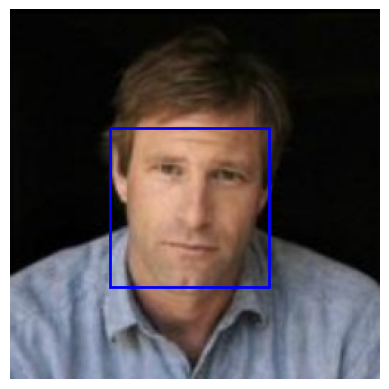

/home/dofi/python/face-classification/lfw/Aaron_Eckhart/Aaron_Eckhart_0001.jpg


In [4]:
import face_recognition as fr
import matplotlib.pyplot as plt

fname = df.index[0]
img_path = f"{img_dir}/{fname}"
img = fr.load_image_file(img_path)
face_loc = fr.face_locations(img)

plt.imshow(img)
for loc in face_loc:
    top, right, bottom, left = loc
    plt.gca().add_patch(plt.Rectangle((left, top), right - left, bottom - top, edgecolor='b', linewidth=2, fill=False))
plt.axis("off")
plt.show()
print(img_path)

### Face Recognition and Image Visualization

```python
import face_recognition as fr
import matplotlib.pyplot as plt
```

Pada bagian ini, kita mengimpor dua library penting:

- `face_recognition`: Library ini digunakan untuk mendeteksi dan mengenali wajah dalam gambar. Ini menyediakan fungsi-fungsi yang memudahkan dalam melakukan analisis wajah.

- `matplotlib.pyplot`: Digunakan untuk memvisualisasikan gambar dan grafik. Ini adalah bagian dari library Matplotlib yang sering digunakan untuk membuat plot dan visualisasi data.

---

```python
fname = df.index[0]
img_path = f"{img_dir}/{fname}"
```

- `fname`: Mengambil nama file gambar dari indeks DataFrame `df`, yang telah diisi sebelumnya dengan nama-nama gambar wajah.

- `img_path`: Membuat path lengkap ke file gambar dengan menggabungkan direktori gambar `img_dir` dan nama file `fname`.

---


```python
img = fr.load_image_file(img_path)
```

Di sini, kita menggunakan fungsi `load_image_file` dari library `face_recognition` untuk memuat gambar dari path yang telah dibuat sebelumnya ke dalam variabel `img`.

---

```python
face_loc = fr.face_locations(img)
```

Fungsi `face_locations` digunakan untuk mendeteksi lokasi wajah dalam gambar. Hasilnya, `face_loc` akan berisi koordinat (top, right, bottom, left) untuk setiap wajah yang terdeteksi.

---

```python
plt.imshow(img)
```

Dengan menggunakan `matplotlib`, kita menampilkan gambar yang telah dimuat.

---

```python
for loc in face_loc:
    top, right, bottom, left = loc
    plt.gca().add_patch(plt.Rectangle((left, top), right - left, bottom - top, edgecolor='b', linewidth=2, fill=False))
```

Bagian ini melakukan iterasi pada setiap lokasi wajah yang terdeteksi. Untuk setiap wajah:

- Kita mendeklarasikan variabel `top`, `right`, `bottom`, dan `left` berdasarkan koordinat yang diberikan.
- Menggunakan `add_patch`, kita menambahkan persegi panjang (rectangle) berwarna biru (`edgecolor='b'`) di sekitar wajah dengan ketebalan garis 2 (`linewidth=2`), tanpa mengisi bagian dalam (`fill=False`).

---

```python
plt.axis("off")
plt.show()
```

- `plt.axis("off")`: Mematikan sumbu pada gambar untuk tampilan yang lebih bersih.

- `plt.show()`: Menampilkan gambar yang telah diproses dengan kotak yang mengelilingi wajah.

In [21]:
from tqdm import tqdm

face_encodes = []
fnames = []
for fname in tqdm(df.index):
    img_path = f"{img_dir}/{fname}"
    img = fr.load_image_file(img_path)
    face_loc = fr.face_locations(img)
    
    if len(face_loc) != 1:
        continue
    
    face_encode = fr.face_encodings(img, known_face_locations=face_loc)[0]
    face_encodes.append(face_encode)
    fnames.append(fname)
    
df_face = pd.DataFrame(face_encodes, index=fnames)
df = df[df.index.isin(df_face.index)]

df_face.sort_index(inplace=True)
df.sort_index(inplace=True)

df_face.to_csv(f"{data_dir}/face_encodes.csv")
df.to_csv(f"{data_dir}/face_attr.csv")
    

 99%|█████████▉| 99/100 [00:09<00:00, 10.17it/s]


### Face Encoding and Saving Data

```python
from tqdm import tqdm
```

Pada bagian ini, kita mengimpor tqdm, sebuah library yang digunakan untuk menampilkan progress bar (pengindikasian kemajuan) dalam loop. Ini membantu untuk memberikan visualisasi seberapa jauh proses berjalan, terutama saat memproses banyak data.

---

```python
face_encodes = []
fnames = []
```

Kita mendeklarasikan dua list kosong:

- `face_encodes`: Untuk menyimpan vektor encoding wajah yang dihasilkan dari gambar.

- `fnames`: Untuk menyimpan nama file gambar yang sesuai dengan encoding yang telah dihitung.

---

```python
for fname in tqdm(df.index):
    img_path = f"{img_dir}/{fname}"
    img = fr.load_image_file(img_path)
    face_loc = fr.face_locations(img)

```

Di sini, kita memulai loop yang akan iterasi melalui setiap nama file gambar yang terdapat dalam indeks DataFrame `df`. `tqdm` akan menampilkan progress bar selama iterasi berlangsung.

Dalam setiap iterasi:

- `img_path`: Membuat path lengkap untuk setiap gambar.

- `img`: Memuat gambar menggunakan `load_image_file`.

- `face_loc`: Menggunakan `face_locations` untuk mendeteksi lokasi wajah dalam gambar.

---

```python
if len(face_loc) != 1:
        continue

face_encode = fr.face_encodings(img, known_face_locations=face_loc)[0]
face_encodes.append(face_encode)
fnames.append(fname)

```

Di sini, kita memeriksa apakah tepat satu wajah terdeteksi dalam gambar. Jika tidak, proses untuk gambar tersebut dilanjutkan ke iterasi berikutnya menggunakan `continue`.

Jika satu wajah terdeteksi, kita melakukan hal berikut:

- `face_encode`: Menggunakan `face_encodings` untuk mendapatkan encoding wajah berdasarkan lokasi yang telah terdeteksi. Hasilnya disimpan di indeks pertama `[0]` karena `face_encodings` mengembalikan list.

- Menambahkan encoding wajah ke list `face_encodes`.

- Menambahkan nama file gambar ke list `fnames`.

---

```python
df_face = pd.DataFrame(face_encodes, index=fnames)
df = df[df.index.isin(df_face.index)]

```

Setelah semua wajah diproses, kita membuat DataFrame baru df_face menggunakan list `face_encodes` sebagai data dan `fnames` sebagai indeks.

Kemudian, kita memperbarui DataFrame asli df untuk hanya menyertakan entri yang memiliki nama file yang sama dengan yang ada di `df_face`.

---

```python
df_face.sort_index(inplace=True)
df.sort_index(inplace=True)

df_face.to_csv(f"{data_dir}/face_encodes.csv")
df.to_csv(f"{data_dir}/face_attr.csv")

```

Kita menyortir kedua DataFrame berdasarkan indeks untuk memastikan bahwa data terurut dengan baik.

Akhirnya, kita menyimpan DataFrame `df_face` ke dalam file CSV bernama `face_encodes.csv` dan DataFrame df ke dalam file CSV bernama `face_attr.csv`, yang berada di direktori yang telah ditentukan (`data_dir`).